<h1><center>Candy task</center></h1>

# My Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from fuzzywuzzy import fuzz, process
from colorama import Fore

# My Figure Size

In [2]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (8,6)  

# Remove Warning

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
candy_data = pd.read_csv('Dataset/candyhierarchy2017.csv')
pd.set_option('display.max_columns',None)
candy_data.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,Na

# Now it is time to explore my data :)

In [5]:
print(Fore.LIGHTBLUE_EX + 'Number of Rows is : ',candy_data.shape[0])
print(Fore.LIGHTBLUE_EX + 'Number of columns is : ',candy_data.shape[1])

Number of Rows is :  2460
Number of columns is :  120


In [6]:
candy_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 120 columns):
 #    Column                                                                                 Non-Null Count  Dtype  
---   ------                                                                                 --------------  -----  
 0    Internal ID                                                                            2460 non-null   int64  
 1    Q1: GOING OUT?                                                                         2350 non-null   object 
 2    Q2: GENDER                                                                             2419 non-null   object 
 3    Q3: AGE                                                                                2376 non-null   object 
 4    Q4: COUNTRY                                                                            2396 non-null   object 
 5    Q5: STATE, PROVINCE, COUNTY, ETC                                   

### Too many NaN values in the data :(

In [7]:
print(Fore.LIGHTBLUE_EX + 'Number of complete duplicates is : ', candy_data.duplicated().sum())

Number of complete duplicates is :  0


In [8]:
print(Fore.LIGHTBLUE_EX + 'Number of id duplicates is : ', candy_data['Internal ID'].duplicated().sum())

Number of id duplicates is :  0


### No complete duplicates or Id duplicates (so no duplicates to remove)

### Ok now I will remove columns that I see it is useless like `id` (I used it only to know if there is duplicates or no)<br><br> And other columns that means nothing here like `Click Coordinates (x, y)` (I don't care about coordinates here)<br><br> And other rows with too much NaN values like ` "other coments" column has 2074 from 2460 value + uncleaned data` <br><br> For `Despair, joy other` columns I will put them in another dataframe so I may deal with it later ... (if it will be usefull)

In [9]:
columns_to_remove = [0, 113, 115, 116, 117, 118, 119, 111, 110, 109]
despair_joy_other = candy_data[['Q7: JOY OTHER','Q8: DESPAIR OTHER']]
candy_data.drop(candy_data.columns[columns_to_remove], axis=1, inplace=True)

### Showing number of NaN values Now

In [10]:
pd.set_option('display.max_rows',None)
candy_data.isna().sum()

Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                                                                   992
Q6 | Bonkers (the board game)                     

In [11]:
pd.reset_option('display.max_rows')

## Data I will continue cleaning on :

In [12]:
candy_data.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Now For Cleaning Stage : 

# Cleaning `going out` column 

### visualizing going out column using count plots

Number of nan values is :  110
 
 No     2038
Yes     312
Name: Q1: GOING OUT?, dtype: int64


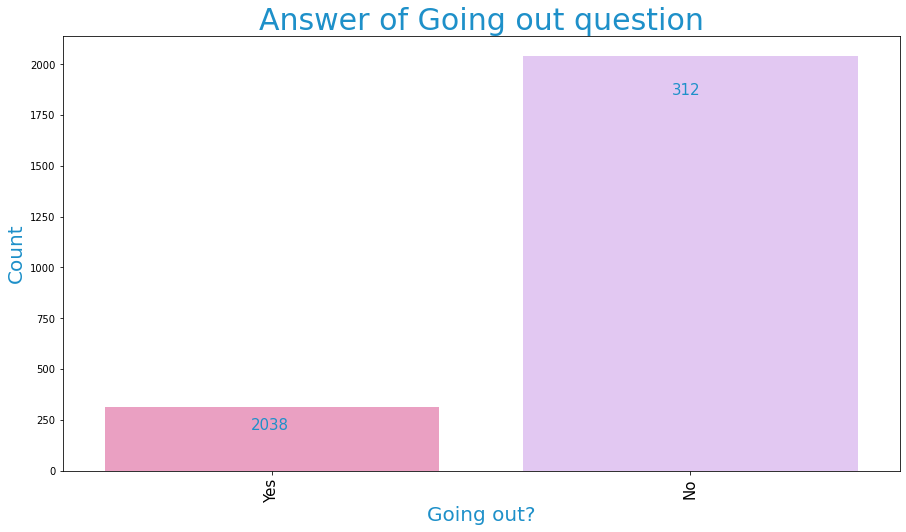

In [13]:
print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q1: GOING OUT?'].isna().sum())
print(Fore.LIGHTMAGENTA_EX,'\n' , candy_data['Q1: GOING OUT?'].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q1: GOING OUT?', data=candy_data, order=['Yes','No'],palette=['#F694C1','#E4C1F9'])

plt.xticks(rotation = 90,size=15)
plt.title('Answer of Going out question',size=30,color='#1e90c9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Going out?',size=20,color='#1e90c9')

plt.text(-0.05, 200, "{}".format(candy_data['Q1: GOING OUT?'].value_counts()[0]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.text(0.955, 1850, "{}".format(candy_data['Q1: GOING OUT?'].value_counts()[1]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.show()

#### everything looks good for now (only nan values is the problem here)

### Ok now I will add this 110 value as random values of yes and no to make no bais for any value so people who didn't answer by yes or no there answer will be replaced by random yes or n value

Number of nan values is :  0
 
 No     2094
Yes     366
Name: Q1: GOING OUT?, dtype: int64


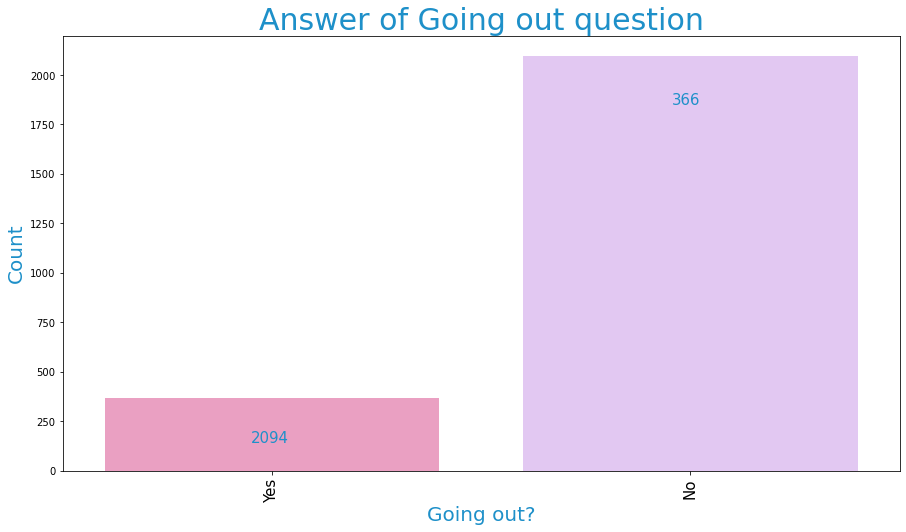

In [14]:
M = len(candy_data.index)
random.seed(1)
candy_data['Q1: GOING OUT?'].replace(np.nan, 'the nan', inplace=True)
for i in range(M):
    if candy_data['Q1: GOING OUT?'].loc[i] == 'the nan':
        candy_data['Q1: GOING OUT?'].loc[i] = random.choice(['Yes', 'No'])

print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q1: GOING OUT?'].isna().sum())
print(Fore.LIGHTMAGENTA_EX,'\n' , candy_data['Q1: GOING OUT?'].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q1: GOING OUT?', data=candy_data, order=['Yes','No'],palette=['#F694C1','#E4C1F9'])

plt.xticks(rotation = 90,size=15)
plt.title('Answer of Going out question',size=30,color='#1e90c9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Going out?',size=20,color='#1e90c9')

plt.text(-0.05, 140, "{}".format(candy_data['Q1: GOING OUT?'].value_counts()[0]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.text(0.955, 1850, "{}".format(candy_data['Q1: GOING OUT?'].value_counts()[1]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.show()

### Now Q1 is clean with no nan values... only yes or no values, and nan values are replaced by random yes and no values to be unbaised and no data loss

# clean ` gender` column

Number of nan values is :  41

 Male                  1467
Female                 839
I'd rather not say      83
Other                   30
Name: Q2: GENDER, dtype: int64


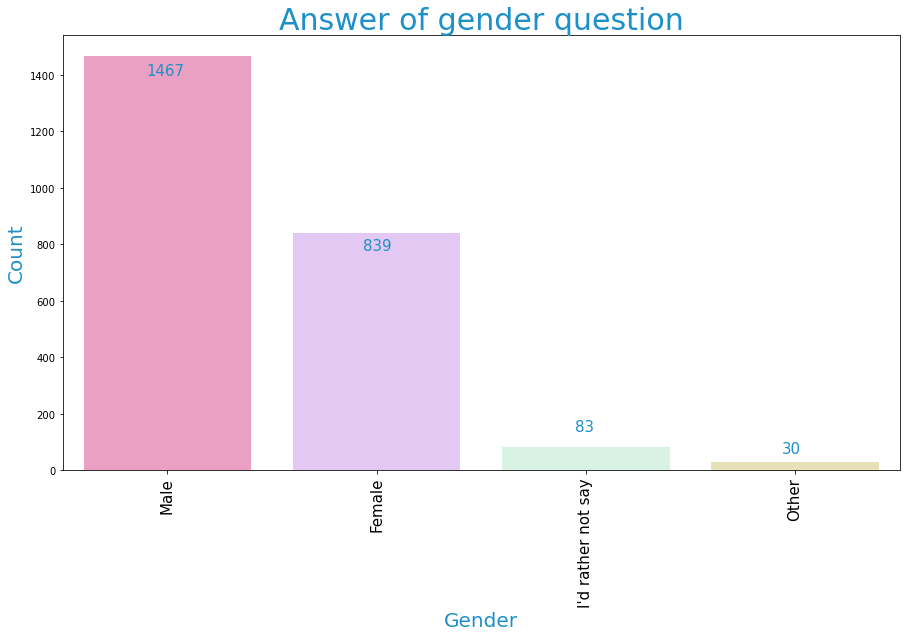

In [15]:
print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q2: GENDER'].isna().sum())
print(Fore.LIGHTMAGENTA_EX + '\n',candy_data['Q2: GENDER'].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q2: GENDER', data=candy_data, order=['Male','Female',"I'd rather not say",'Other'],
           palette=['#F694C1','#E4C1F9','#D3F8E2','#EDE7B1'])

plt.title('Answer of gender question',size=30,color='#1e90c9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Gender',size=20,color='#1e90c9')

plt.text(-0.1, 1400, "{}".format(candy_data['Q2: GENDER'].value_counts()[0]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.text(0.935, 780, "{}".format(candy_data['Q2: GENDER'].value_counts()[1]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.text(1.95, 140, "{}".format(candy_data['Q2: GENDER'].value_counts()[2]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.text(2.935, 60, "{}".format(candy_data['Q2: GENDER'].value_counts()[3]),
        horizontalalignment='left', size=15, color='#1e90c9')


plt.xticks(rotation = 90,size=15)
plt.show()

### I will replace nan values by I'd rather not say
### becaues that means that person don't want to say either he is Male or Female

Number of nan values is :  0

 Male                  1467
Female                 839
I'd rather not say     124
Other                   30
Name: Q2: GENDER, dtype: int64


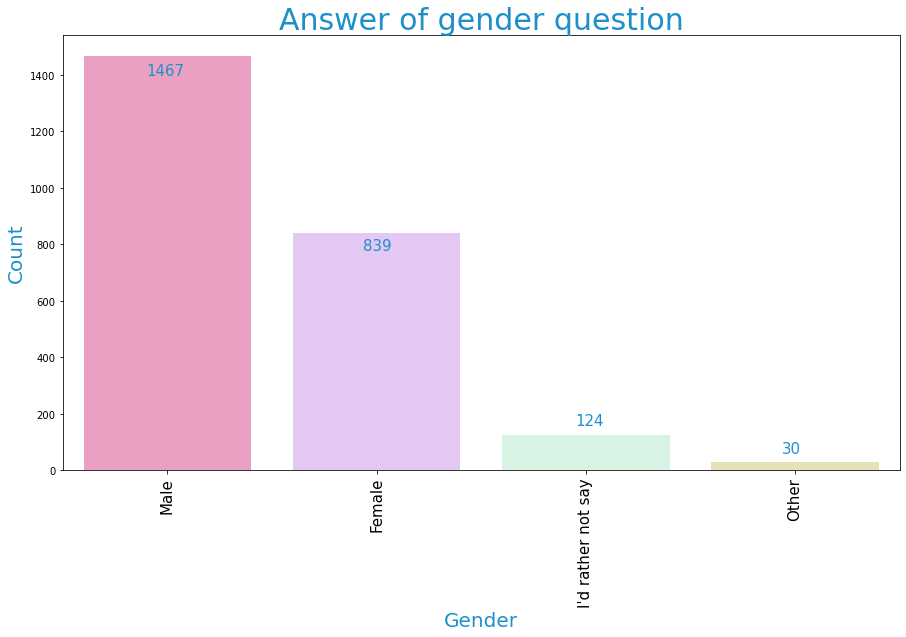

In [16]:
candy_data['Q2: GENDER'].replace(np.nan, "I'd rather not say", inplace=True)

print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q2: GENDER'].isna().sum())
print(Fore.LIGHTMAGENTA_EX + '\n',candy_data['Q2: GENDER'].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q2: GENDER', data=candy_data, order=['Male','Female',"I'd rather not say",'Other'],
           palette=['#F694C1','#E4C1F9','#D3F8E2','#EDE7B1'])

plt.title('Answer of gender question',size=30,color='#1e90c9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Gender',size=20,color='#1e90c9')

plt.text(-0.1, 1400, "{}".format(candy_data['Q2: GENDER'].value_counts()[0]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.text(0.935, 780, "{}".format(candy_data['Q2: GENDER'].value_counts()[1]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.text(1.95, 160, "{}".format(candy_data['Q2: GENDER'].value_counts()[2]),
        horizontalalignment='left', size=15, color='#1e90c9')

plt.text(2.935, 60, "{}".format(candy_data['Q2: GENDER'].value_counts()[3]),
        horizontalalignment='left', size=15, color='#1e90c9')


plt.xticks(rotation = 90,size=15)
plt.show()

### Now Q2 is clean with no nan values... I replaced nan values by I'd rather not to say

# clean ` age` column

In [17]:
print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q3: AGE'].isna().sum())

Number of nan values is :  84


### I will drop all nan and non-digit values here (only to get mean to use later)
### I will replace nan values with mean 

In [18]:
to_drop = candy_data['Q3: AGE'].str.isdigit()
to_drop.replace(np.nan, False, inplace=True)
droped_nans = candy_data['Q3: AGE'][to_drop].astype('int')

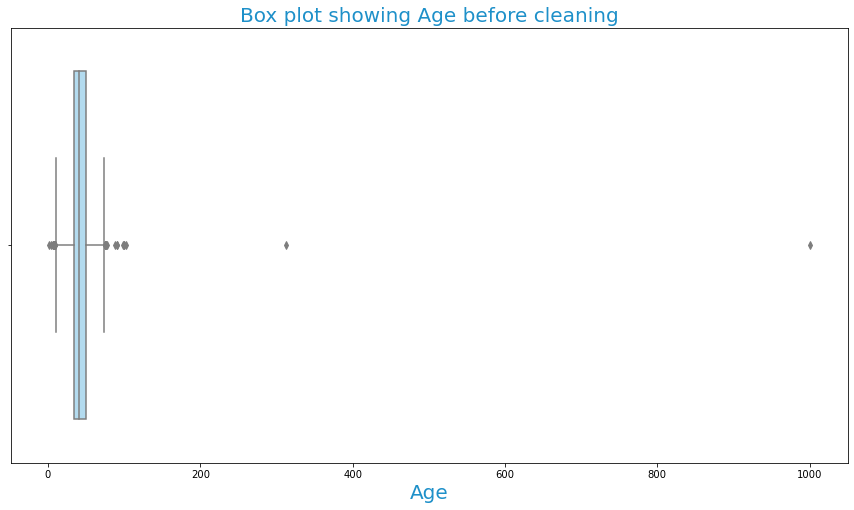

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=droped_nans,color='#A9DEF9')
plt.title('Box plot showing Age before cleaning',size=20,color='#1e90c9')
plt.xlabel('Age',size=20,color='#1e90c9')
plt.show() 

### From preivous graph we can notice obvious outliers

#### I will be intrested about data between 5 to 85 age 
#### I others I will replace by 5 or 85 (some of the outliers will be replaced)

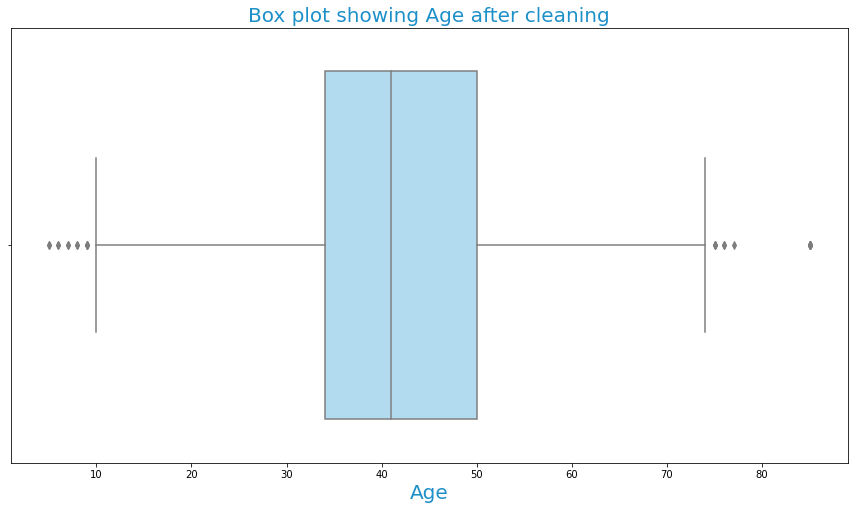

In [20]:
droped_nans[droped_nans > 85] = 85         
droped_nans[droped_nans < 5] = 5     

## others I considered as outliers.... I know I took some of outliers in my data 
## but that is because I see it is reasionable to have people of age 85 or 5 eating candy :)

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=droped_nans,color='#A9DEF9')
plt.title('Box plot showing Age after cleaning',size=20,color='#1e90c9')
plt.xlabel('Age',size=20,color='#1e90c9')
plt.show() 


In [21]:
my_mean = int(droped_nans.mean())
my_std = int(droped_nans.std())

old_words = ['Old', 'Many', 'older', 'Over', '5u', 'ancient', 'old', 'OLD', '60+', 'I']

candy_data['Q3: AGE'].fillna('A NAN', inplace=True)
for i in range(len(candy_data['Q3: AGE'])):
    if i == 2460:
        break
    if str(candy_data['Q3: AGE'].loc[i]).isdigit() == False:
        if candy_data['Q3: AGE'].loc[i] == 'A NAN':
            candy_data['Q3: AGE'].loc[i] = my_mean
        list_of_new_df = str(candy_data['Q3: AGE'].loc[i]).split()
        if list_of_new_df[0] in old_words:
            candy_data['Q3: AGE'].loc[i] = my_mean + my_std
        if list_of_new_df[0].isdigit() == True:
            candy_data['Q3: AGE'].loc[i] = int(list_of_new_df[0])
        else:
            candy_data['Q3: AGE'].loc[i] = my_mean - my_std

Number of nan values ---------> 0


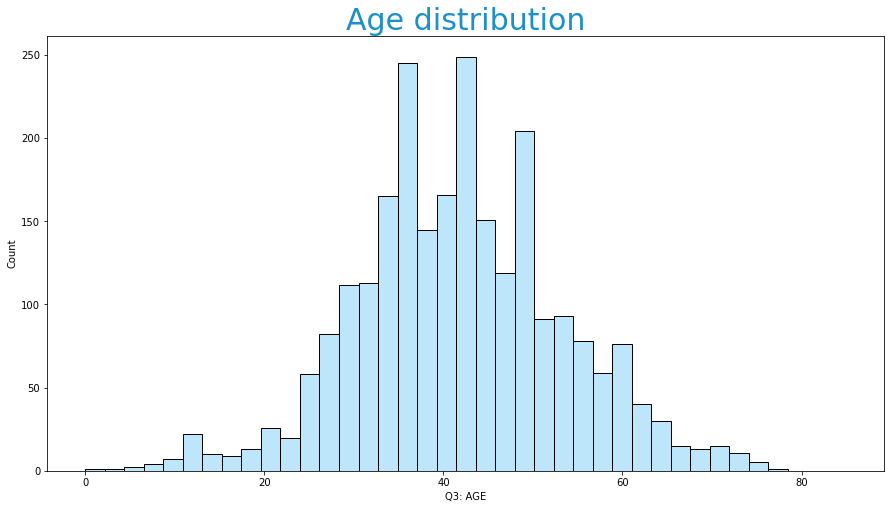

In [22]:
print(Fore.LIGHTBLUE_EX + 'Number of nan values --------->',candy_data['Q3: AGE'].isna().sum())
## Finally no nan values in age
candy_data['Q3: AGE'] = candy_data['Q3: AGE'].astype('int')

fig, ax = plt.subplots(figsize=(15, 8))
plt.title('Age distribution',size=30,color='#1e90c9')
sns.histplot(x=candy_data['Q3: AGE'],binrange=[0,85],color='#A9DEF9')
plt.show()

## Now Age is clean :)

#  clean ` area` column

In [23]:
print(candy_data['Q4: COUNTRY'].value_counts())
candy_data['Q4: COUNTRY'].fillna('Unknown', inplace=True)

unique_types = candy_data['Q4: COUNTRY'].unique()
## I will create a category to deal with

unique_types

USA                            699
United States                  497
usa                            217
Canada                         179
Usa                            139
                              ... 
usas                             1
'merica                          1
USA? Hard to tell anymore..      1
Greece                           1
Fear and Loathing                1
Name: Q4: COUNTRY, Length: 128, dtype: int64


array(['Unknown', 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us',
       'US', 'Murica', 'United States', 'uk', 'United Kingdom',
       'united states', 'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', '35',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', '45', 'United State', '32',
       'France', 'australia', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sat

In [24]:
candy_data['Q4: COUNTRY'] = candy_data['Q4: COUNTRY'].str.strip().str.lower()

countries = pd.Series(['usa', 'united states of america','america','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands', 
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa', 
                       'japan', 'greece', 'costa rica', 'germany', 'finland', 'france', 'mexico'])


for country in countries:
    matches = process.extract(country, candy_data['Q4: COUNTRY'], limit = candy_data.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            candy_data.loc[candy_data['Q4: COUNTRY'] == potential_match[0], 'Q4: COUNTRY'] = country
            
candy_data['Q4: COUNTRY'].unique()

array(['unknown', 'usa', 'canada', 'murica', 'america', 'uk', 'uae',
       'united kingdom england', 'mexico', 'u.s.a.', '35', 'france',
       'finland', 'north carolina', 'netherlands', 'germany', 'europe',
       'earth', 'u.k.', 'costa rica', '46', 'cascadia', 'australia',
       'insanity lately', 'greece', 'usa? hard to tell anymore..',
       'pittsburgh', '45', '32', 'canae', 'new york', 'trumpistan',
       'iceland', 'south korea', 'california', 'japan', 'south africa',
       'scotland', 'denmark', 'switzerland', 'ud', 'new jersey',
       'indonesia', 'endland', 'atlantis', 'murrika', 'alaska',
       'soviet canuckistan', 'singapore', 'china', 'taiwan', 'hong kong',
       'spain', 'sweden', 'narnia', 'u s a', '1',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [25]:
candy_data['Q4: COUNTRY'].value_counts()

usa                               1319
america                            726
canada                             226
unknown                             64
uk                                  18
germany                             10
u.s.a.                               8
netherlands                          7
australia                            7
iceland                              5
scotland                             5
japan                                5
mexico                               4
france                               3
switzerland                          3
denmark                              2
south korea                          2
hong kong                            2
china                                2
sweden                               2
narnia                               1
indonesia                            1
i don't know anymore                 1
subscribe to dm4uz3 on youtube       1
ud                                   1
new jersey               

In [26]:
mapping = {'murica':'usa', 'united states of america':'usa','america':'usa', 'u.s.a.':'usa','32':'unknown','45':'unknown',
        'north carolina':'usa', 'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'new york':'usa', 'trumpistan':'usa',
          'california':'usa', 'ud':'usa', 'new jersey':'usa', 'endland':'uk', 'soviet canuckistan':'canada',
           'u s a':'usa', 'united kingdom england':'uk', 'u.k.':'uk', 'cascadia':'usa','1':'unknown','fear and loathing':'unknown',
           "i don't know anymore":'unknown','murica':'unknown','atlantis':'unknown','subscribe to dm4uz3 on youtube':'unknown',
           'murrika':'unknown','narnia':'unknown','ud':'unknown','new jersey':'usa','murrika':'unknown','35':'unknown','earth':'unknown'
           ,'46':'unknown','insanity lately':'unknown','europe':'unknown','canae':'uk','hong kong':'china'
          }
candy_data['Q4: COUNTRY'] = candy_data['Q4: COUNTRY'].replace(mapping)

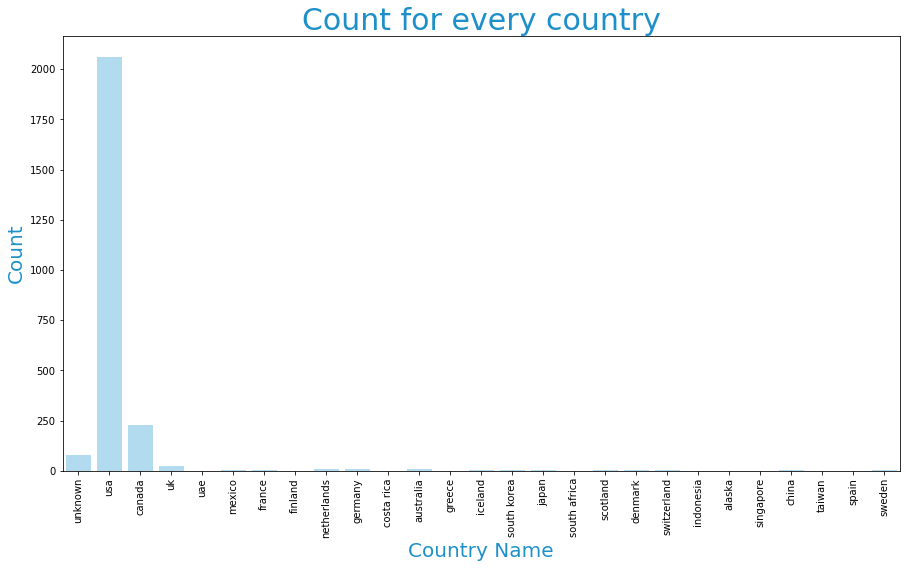

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.title('Count for every country',size=30,color='#1e90c9')
sns.countplot(x='Q4: COUNTRY',data=candy_data,color='#A9DEF9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Country Name',size=20,color='#1e90c9')
plt.xticks(rotation=90)
plt.show()

#  clean ` Q6` columns

### I will make new dataframe named as `question_6` that will have only Q6 columns

In [28]:
Q6 = candy_data.columns[5:108]
question_6 = candy_data[Q6]
question_6.head()
## This is question 6

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH

## I will replace nan by unknown assuming that user don't know that kind of candy

In [29]:
question_6.fillna('Unknown',inplace=True)

## I will try to do a point system for question 6 where :


> - if Joy then + 1 point to that candy <br><br>
> - meh then + 0 point to that candy <br><br>
> - despair then -1 point to that candy <br><br>
> - unknown then +1 point to unknown

## This means that I will make 2 point systems to know whether candy has high score and another one showing the popularity of that candy and whether it is known or no

In [30]:
candy_points = question_6.replace(['JOY','MEH','DESPAIR','Unknown'],[1,0,-1,0])
candy_points.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-1,1,0,-1,-1,-1,-1,-1,-1,0,0,-1,0,1,0,-1,-1,-1,-1,-1,0,1,-1,-1,-1,-1,0,-1,0,0,-1,0,1,1,0,-1,-1,0,-1,-1,-1,-1,-1,1,-1,0,0,1,0,-1,-1,-1,0,0,1,1,0,1,1,1,1,-1,-1,0,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,0,-1,-1,0,-1,0,-1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,-1,1,0,0,-1,0,-1,-1,0,0,-1,-1,0,1,0,1,0,-1,-1,-1,1,1,0,0,1,1,0,-1,1,0,0,-1,0,0,0,0,0,0,-1,-1,-1,-1,0,0,1,1,0,1,1,-1,1,0,0,-1,1,0,1,0,0,0,0,0,-1,-1,0,0,-1,0,0,0,-1,-1,-1,-1,1,0,0,0,-1,-1,-1,0,1,0,-1,0,0,1,0,1,0,-1,-1,1,0,1,-1,1,1,-1,-1,-1
4,1,-1,1,-1,0,-1,0,-1,-1,0,0,-1,-1,1,0,1,-1,-1,0,-1,-1,0,1,-1,-1,-1,0,0,-1,1,0,-1,-1,1,0,0,-1,0,1,0,1,-1,-1,1,1,1,1,0,-1,1,0,0,-1,0,0,1,1,1,1,1,1,1,0,-1,1,1,0,-1,1,1,1,0,-1,1,-1,1,1,0,1,0,1,1,-1,0,0,-1,1,1,0,-1,0,-1,-1,1,1,-1,1,0,1,1,-1,-1,1


In [31]:
candy_score_list = []
for i in candy_points.columns:
    candy_score = candy_points[i].sum()
    candy_score_list.append(candy_score)
scores_table = list(zip(list(candy_points.columns), candy_score_list))
candy_score_table = pd.DataFrame(scores_table,columns=['candy name', 'candy score'])
candy_score_table.head()

,candy name,candy score
0,Q6 | 100 Grand Bar,788
1,Q6 | Anonymous brown globs that come in black ...,-913
2,Q6 | Any full-sized candy bar,1542
3,Q6 | Black Jacks,-701
4,Q6 | Bonkers (the candy),-379


#### Making a color palette :
#### I chosed this colors as it looks like candy colors :)

In [32]:
my_palette = sns.color_palette(['#D3F8E2','#E4C1F9','#F694C1','#EDE7B1','#A9DEF9'], 5)
my_palette

[(0.8274509803921568, 0.9725490196078431, 0.8862745098039215),
 (0.8941176470588236, 0.7568627450980392, 0.9764705882352941),
 (0.9647058823529412, 0.5803921568627451, 0.7568627450980392),
 (0.9294117647058824, 0.9058823529411765, 0.6941176470588235),
 (0.6627450980392157, 0.8705882352941177, 0.9764705882352941)]

## Highest loved candies:

In [33]:
best_5 = candy_score_table.nlargest(n=5, columns=['candy score'])
best_5

,candy name,candy score
2,Q6 | Any full-sized candy bar,1542
75,Q6 | Reese’s Peanut Butter Cups,1403
44,Q6 | Kit Kat,1395
14,"Q6 | Cash, or other forms of legal tender",1374
96,Q6 | Twix,1342


## Least loved candies:

In [34]:
worst_5 = candy_score_table.nsmallest(n=5, columns=['candy score'])
worst_5

,candy name,candy score
8,Q6 | Broken glow stick,-1601
28,Q6 | Gum from baseball cards,-1418
100,Q6 | White Bread,-1411
74,Q6 | Real Housewives of Orange County Season 9...,-1389
20,Q6 | Dental paraphenalia,-1342


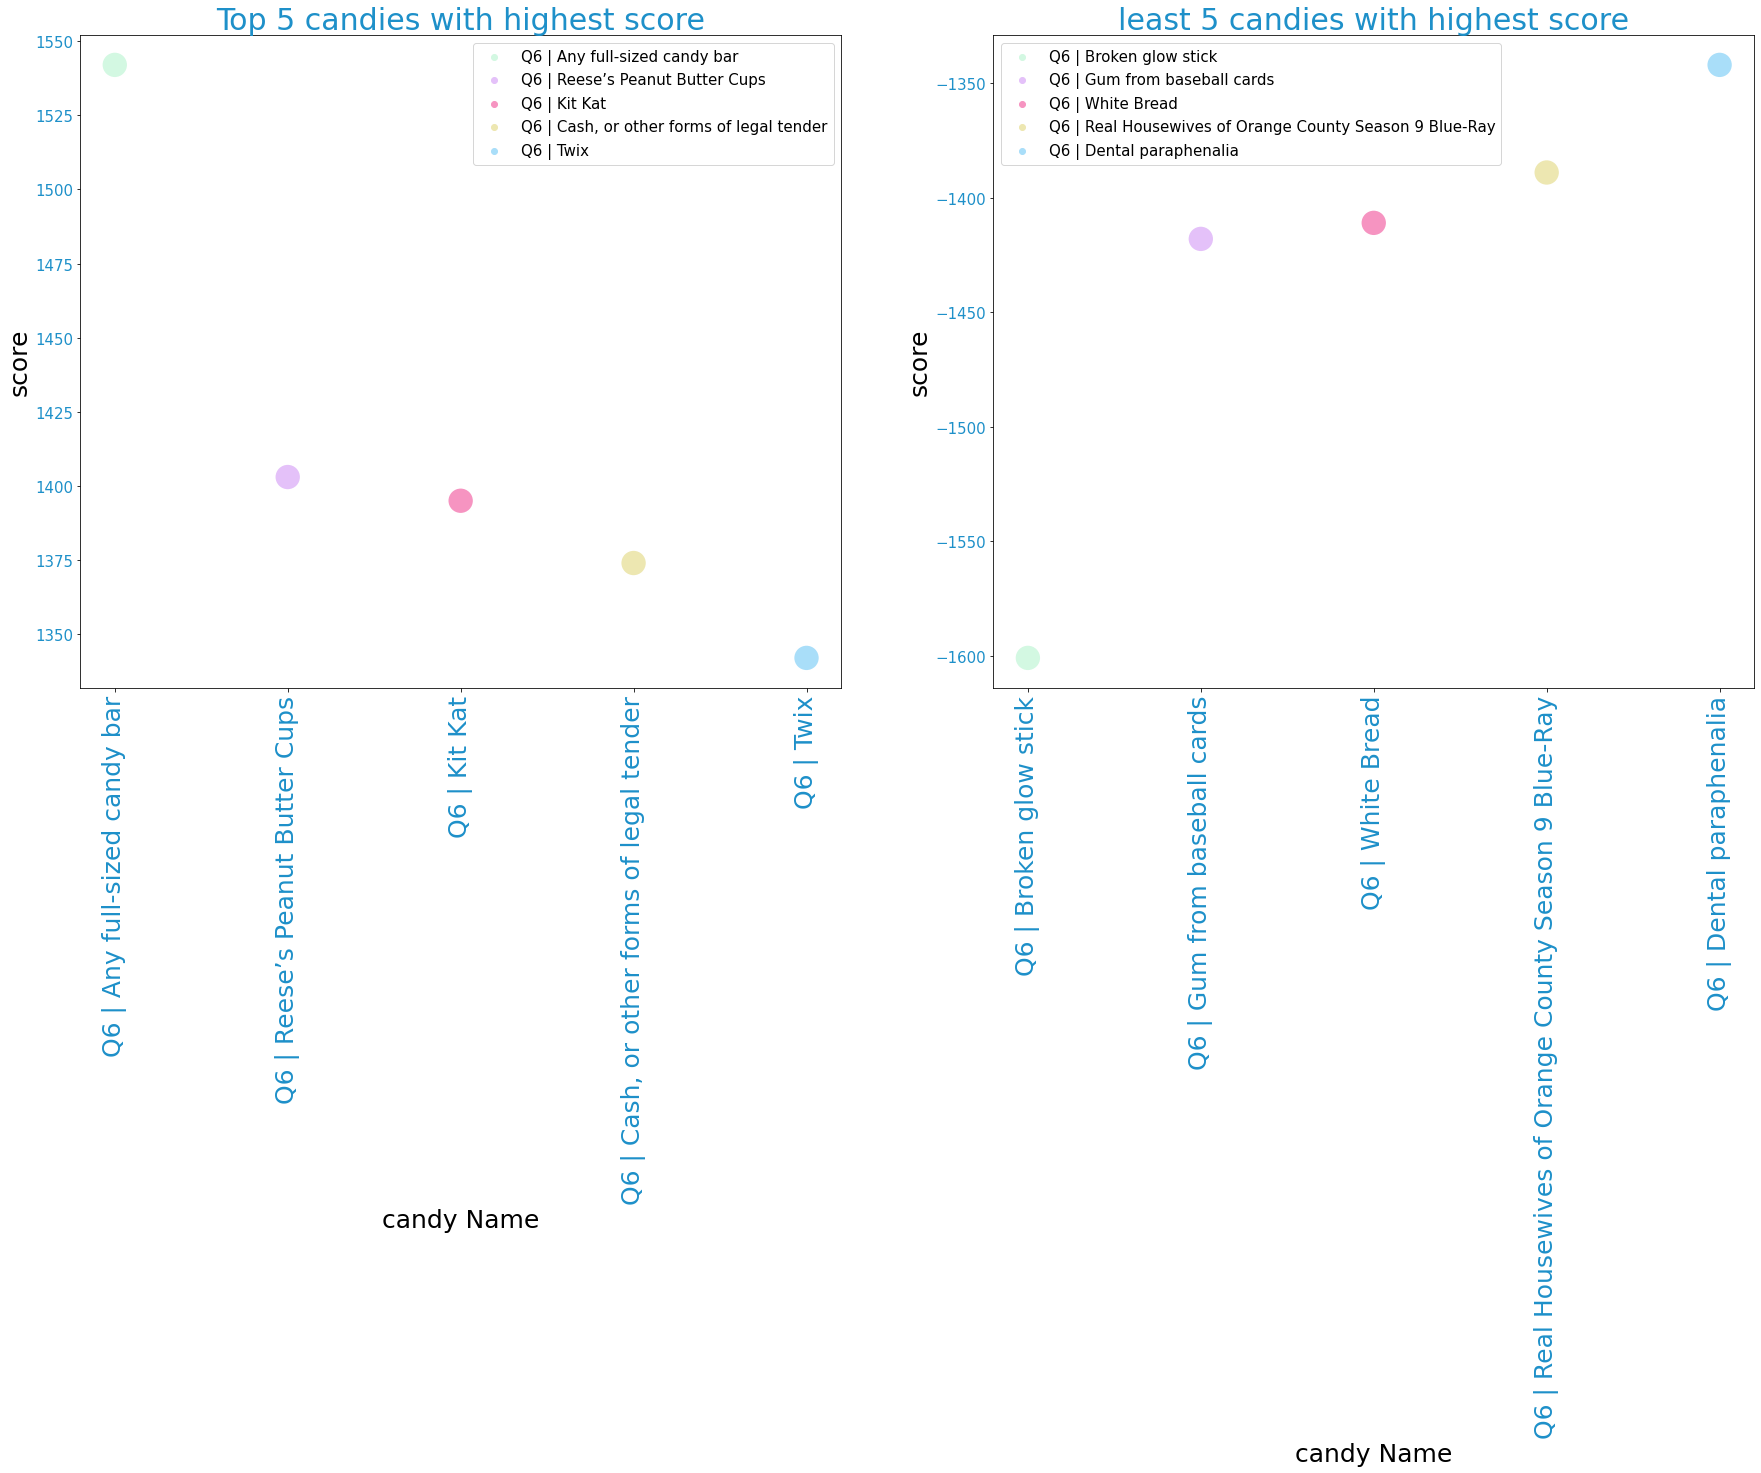

In [35]:
fig = plt.figure(figsize=(30,12))

sub = fig.add_subplot(1,2,1)

g = sns.scatterplot(x='candy name',y='candy score',data=best_5,s=700,palette=my_palette,hue='candy name')
plt.title('Top 5 candies with highest score',size=30,color='#1e90c9')
plt.xticks(rotation=90,size=25,color='#1e90c9')
plt.yticks(size=15,color='#1e90c9')
plt.xlabel('candy Name',size=25)
plt.ylabel('score',size=25)
g.legend(fontsize=15)

# -------------------------------------------------------------------------------------------------------- #

sub = fig.add_subplot(1,2,2)

g = sns.scatterplot(x='candy name',y='candy score',data=worst_5,s=700,palette=my_palette,hue='candy name')
plt.title('least 5 candies with highest score',size=30,color='#1e90c9')
plt.xticks(rotation=90,size=25,color='#1e90c9')
plt.yticks(size=15,color='#1e90c9')
plt.xlabel('candy Name',size=25)
plt.ylabel('score',size=25)
g.legend(fontsize=15)

plt.show()

## This shows what best 5 and worst 5 candy scores looks like (Note that worst data has negative values for score)

## now for how famous is the candy

In [36]:
candy_unknown = question_6.replace(['JOY','MEH','DESPAIR','Unknown'],[0,0,0,1])
candy_unknown.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,Q6 | Hershey's Kisses,Q6 | Hugs (actual physical hugs),Q6 | Jolly Rancher (bad flavor),Q6 | Jolly Ranchers (good flavor),Q6 | JoyJoy (Mit Iodine!),Q6 | Junior Mints,Q6 | Senior Mints,Q6 | Kale smoothie,Q6 | Kinder Happy Hippo,Q6 | Kit Kat,Q6 | LaffyTaffy,Q6 | LemonHeads,Q6 | Licorice (not black),Q6 | Licorice (yes black),Q6 | Lindt Truffle,Q6 | Lollipops,Q6 | Mars,Q6 | Maynards,Q6 | Mike and Ike,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Blue M&M's,Q6 | Red M&M's,Q6 | Green Party M&M's,Q6 | Independent M&M's,Q6 | Abstained from M&M'ing.,Q6 | Minibags of chips,Q6 | Mint Kisses,Q6 | Mint Juleps,Q6 | Mr. Goodbar,Q6 | Necco Wafers,Q6 | Nerds,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
candy_unknown_list = []
for i in candy_unknown.columns:
    candy_unknown_points = candy_unknown[i].sum()
    candy_unknown_list.append(candy_unknown_points)
unknown_table = list(zip(list(candy_unknown.columns), candy_unknown_list))
candy_unkown_table = pd.DataFrame(unknown_table,columns=['candy name', 'how much is the candy unknown'])
candy_unkown_table

,candy name,how much is the candy unknown
0,Q6 | 100 Grand Bar,747
1,Q6 | Anonymous brown globs that come in black ...,734
2,Q6 | Any full-sized candy bar,672
3,Q6 | Black Jacks,958
4,Q6 | Bonkers (the candy),992
...,...,...
98,Q6 | Vicodin,789
99,Q6 | Whatchamacallit Bars,823
100,Q6 | White Bread,757
101,Q6 | Whole Wheat anything,747


## most famous candies:

In [38]:
famous_5 = candy_unkown_table.nsmallest(n=5, columns=['how much is the candy unknown'])
famous_5

,candy name,how much is the candy unknown
57,Q6 | Peanut M&M’s,671
2,Q6 | Any full-sized candy bar,672
34,Q6 | Hershey’s Milk Chocolate,672
33,Q6 | Hershey's Dark Chocolate,673
44,Q6 | Kit Kat,674


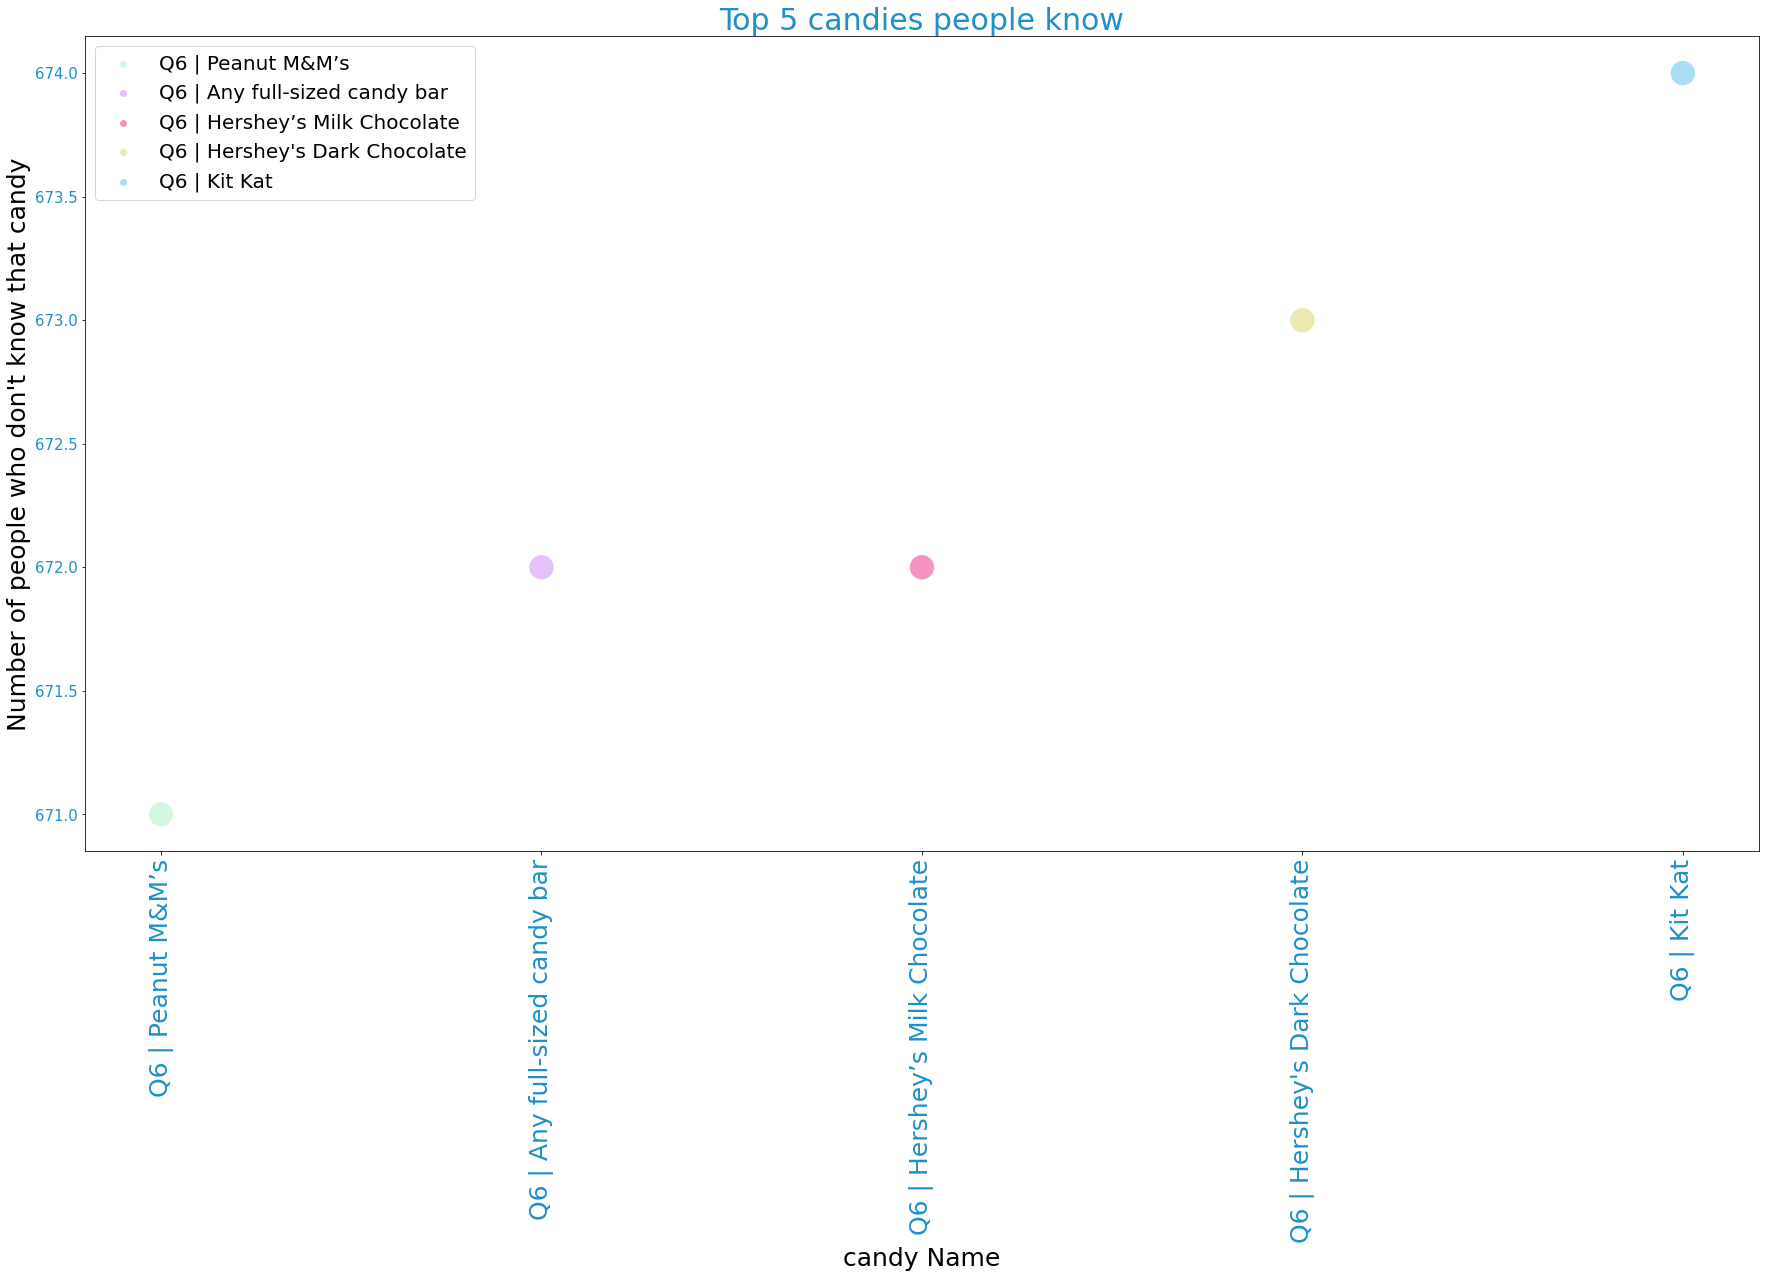

In [39]:
fig = plt.figure(figsize=(30,15))


g = sns.scatterplot(x='candy name',y='how much is the candy unknown',data=famous_5,s=700,palette=my_palette,hue='candy name')
plt.title('Top 5 candies people know',size=30,color='#1e90c9')
plt.xticks(rotation=90,size=25,color='#1e90c9')
plt.yticks(size=15,color='#1e90c9')
plt.xlabel('candy Name',size=25)
plt.ylabel("Number of people who don't know that candy",size=25)
g.legend(fontsize=20)

plt.show()

## clean ` dress` column

Number of nan values is :  744
 
 White and gold    1081
Blue and black     635
Name: Q10: DRESS, dtype: int64


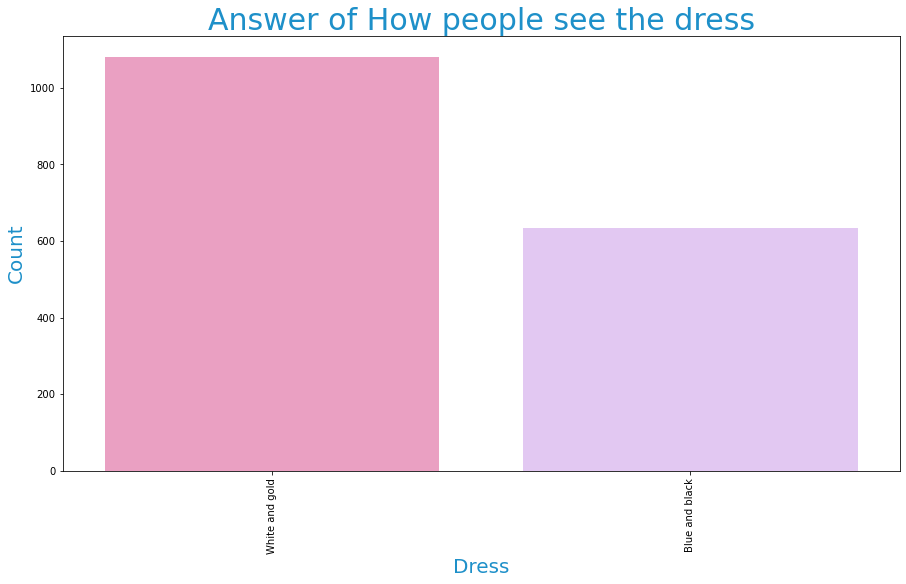

In [40]:
print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q10: DRESS'].isna().sum())
print(Fore.LIGHTMAGENTA_EX,'\n' , candy_data['Q10: DRESS'].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q10: DRESS', data=candy_data,palette=['#F694C1','#E4C1F9'])
plt.title('Answer of How people see the dress',size=30,color='#1e90c9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Dress',size=20,color='#1e90c9')

plt.xticks(rotation = 90)
plt.show()

Number of nan values is :  0
 
 White and gold    1454
Blue and black    1006
Name: Q10: DRESS, dtype: int64


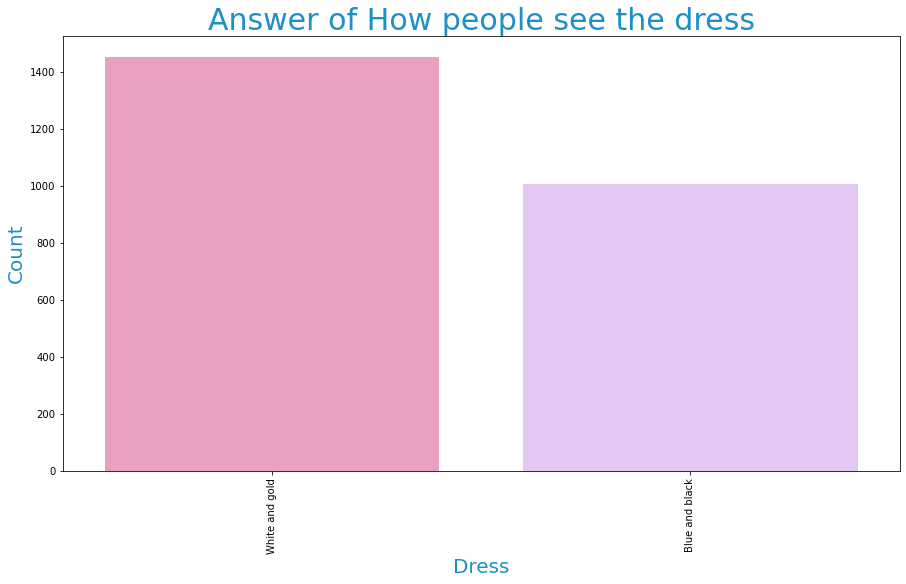

In [41]:
M = len(candy_data.index)
random.seed(1)
candy_data['Q10: DRESS'].replace(np.nan, 'the nan', inplace=True)
for i in range(M):
    if candy_data['Q10: DRESS'].loc[i] == 'the nan':
        candy_data['Q10: DRESS'].loc[i] = random.choice(['White and gold', 'Blue and black'])

print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q10: DRESS'].isna().sum())
print(Fore.LIGHTMAGENTA_EX,'\n' , candy_data['Q10: DRESS'].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q10: DRESS', data=candy_data,palette=['#F694C1','#E4C1F9'])
plt.title('Answer of How people see the dress',size=30,color='#1e90c9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Dress',size=20,color='#1e90c9')

plt.xticks(rotation = 90)
plt.show()

##  clean ` day` column

Number of nan values is :  725
 
 Friday    1091
Sunday     644
Name: Q11: DAY, dtype: int64


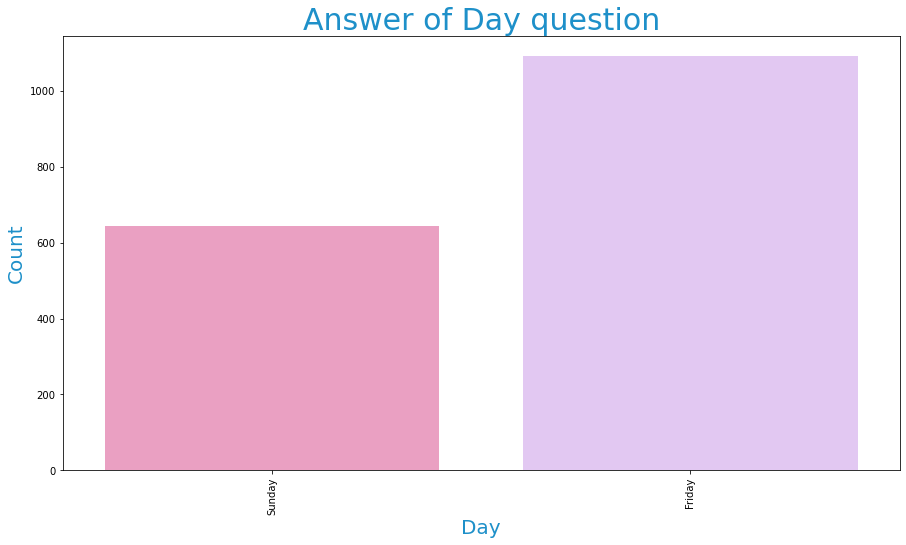

In [42]:
print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q11: DAY'].isna().sum())
print(Fore.LIGHTMAGENTA_EX,'\n' , candy_data['Q11: DAY'].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q11: DAY', data=candy_data,palette=['#F694C1','#E4C1F9'])
plt.title('Answer of Day question',size=30,color='#1e90c9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Day',size=20,color='#1e90c9')

plt.xticks(rotation = 90)
plt.show()

Number of nan values is :  0
 
 Friday    1451
Sunday    1009
Name: Q11: DAY, dtype: int64


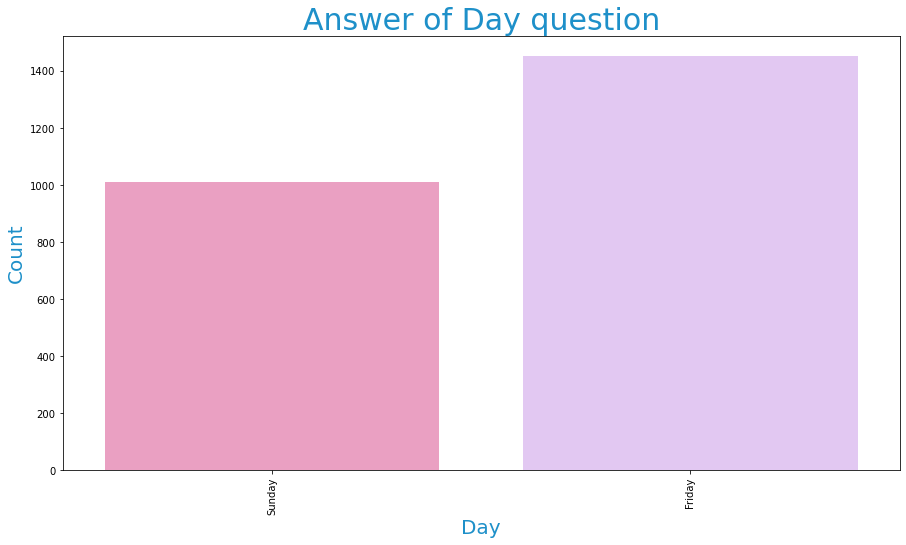

In [43]:
M = len(candy_data.index)
random.seed(1)
candy_data['Q11: DAY'].replace(np.nan, 'the nan', inplace=True)
for i in range(M):
    if candy_data['Q11: DAY'].loc[i] == 'the nan':
        candy_data['Q11: DAY'].loc[i] = random.choice(['Sunday', 'Friday'])

print(Fore.LIGHTBLUE_EX + 'Number of nan values is : ',candy_data['Q11: DAY'].isna().sum())
print(Fore.LIGHTMAGENTA_EX,'\n' , candy_data['Q11: DAY'].value_counts())

fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='Q11: DAY', data=candy_data,palette=['#F694C1','#E4C1F9'])
plt.title('Answer of Day question',size=30,color='#1e90c9')
plt.ylabel('Count',size=20,color='#1e90c9')
plt.xlabel('Day',size=20,color='#1e90c9')

plt.xticks(rotation = 90)
plt.show()

## SUMMARY:

### I cleaned the data No column now has nan values. <br> All are replaced either by random values or by values I choose like mean or other things
### Previously I printed Candy data that I think is the most popular, I will show it again here <br> but I also printed candies that I think is famous and many people knows it 

### Most loved :

In [44]:
candy_score_table.nlargest(n=5, columns=['candy score'])

,candy name,candy score
2,Q6 | Any full-sized candy bar,1542
75,Q6 | Reese’s Peanut Butter Cups,1403
44,Q6 | Kit Kat,1395
14,"Q6 | Cash, or other forms of legal tender",1374
96,Q6 | Twix,1342


## Least Loved:

In [45]:
candy_score_table.nsmallest(n=5, columns=['candy score'])

,candy name,candy score
8,Q6 | Broken glow stick,-1601
28,Q6 | Gum from baseball cards,-1418
100,Q6 | White Bread,-1411
74,Q6 | Real Housewives of Orange County Season 9...,-1389
20,Q6 | Dental paraphenalia,-1342


## I also now know that :
> 1-Most people aren't going out <br><br>
> 2-The most gender is for males <br><br>
> 3-Mean age is 43 (before my dataset even more baised towards mean) <br><br>
> 4-Most people are from USA <br><br>
> 5-Most and least popular candies are in the table above <br><br>
> 6-Most people prefers Friday <br><br>